In [1]:
import pandas as pd
import json

import numpy as np
import matplotlib.pyplot as plt

fileName = 'packageCost.csv'

packageCosts = pd.read_csv(fileName)
costs = packageCosts['cost']

[  6.02351000e+05   4.34690000e+04   1.43060000e+04   7.09600000e+03
   3.21700000e+03   2.05500000e+03   1.44500000e+03   1.96500000e+03
   4.58000000e+02   1.27000000e+02   3.80000000e+01   5.00000000e+00
   1.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00
   1.00000000e+00   0.00000000e+00   1.00000000e+00   0.00000000e+00
   0.00000000e+00   1.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   1.00000000e+00] [    0.           136.58064516   273.16129032   409.74193548   546.32258065
   682.90322581   819.48387097   956.06451613  1092.64516129  1229.22580645
  1365.80645161  1502.38709677  1638.96774194  1775.5483871   1912.12903226
  2048.70967742  2185.29032258  2321.87096774  2458.4516129   2595.03225806
  2731.61290323  2868.19354839  3004.77419355  3141.35483871  3277.93548387
  3414.51612903  3551.09677419  3687.67741935  3824.25806452  3960.83870968
  4097.4

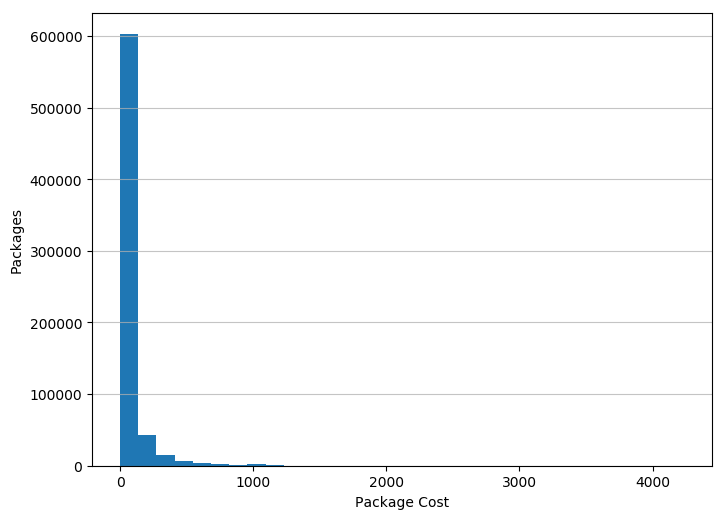

In [2]:
plt.figure(figsize=(8,6), dpi=100)
n, bins, patches = plt.hist(costs, bins='doane')
plt.grid(axis='y', alpha=0.75)
# plt.gca().set_xticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_xticks()]) 
plt.xlabel('Package Cost')
plt.ylabel('Packages')
print(n,bins)
plt.savefig('{}.png'.format(fileName))

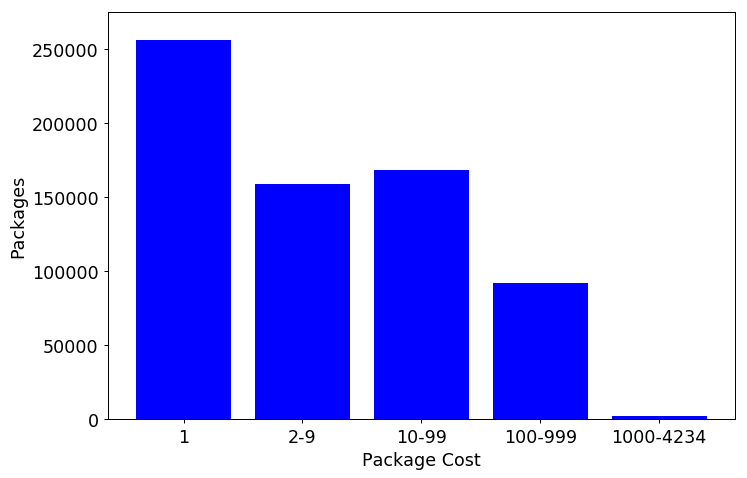

In [3]:
import matplotlib
matplotlib.rcParams.update({'font.size': 14})

bar1 = costs[costs == 0]
bar2 = costs[costs.between(1, 9)] 
bar3 = costs[costs.between(10, 99)]
bar4 = costs[costs.between(100, 999)]
bar5 = costs[costs.between(1000, 9999)]

maxCost = costs.max()

Y = [len(bar1), len(bar2), len(bar3), len(bar4), len(bar5)]
X = np.arange(0, len(Y), step=1)

plt.figure(figsize=(9,6), dpi=90)
plt.bar(X, Y, color="blue")

# for x,y in zip(X,Y):
#     plt.text(x, y, y, ha='center', va= 'bottom')

plt.xlabel('Package Cost')
plt.ylabel('Packages')
plt.ylim(0, 275000)
plt.xticks(np.arange(0, len(Y), step=1), ['1', '2-9', '10-99', '100-999', '1000-{}'.format(maxCost)])

plt.savefig('{}.png'.format(fileName))

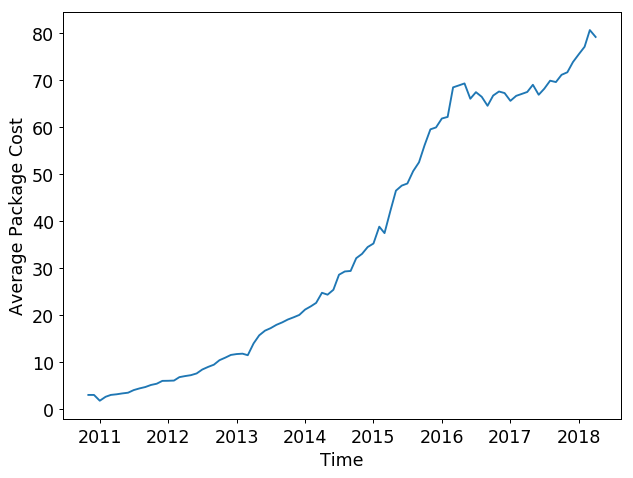

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

def transformDf(df, key):
    df[key] = pd.to_datetime(df[key])
    df = df.set_index(key)
    return df

dataAvg = pd.read_json('withoutAzer/averagePackageCost.json')
averagePackageCost = transformDf(dataAvg, "Key")

plt.rcParams.update({'font.size': 14})

plt.figure(figsize=(8,6), dpi=90)
plt.xlabel('Time')
plt.ylabel('Average Package Cost')
plt.plot(averagePackageCost["Value"])
plt.savefig("withoutAzer/averagePackageCost.png")

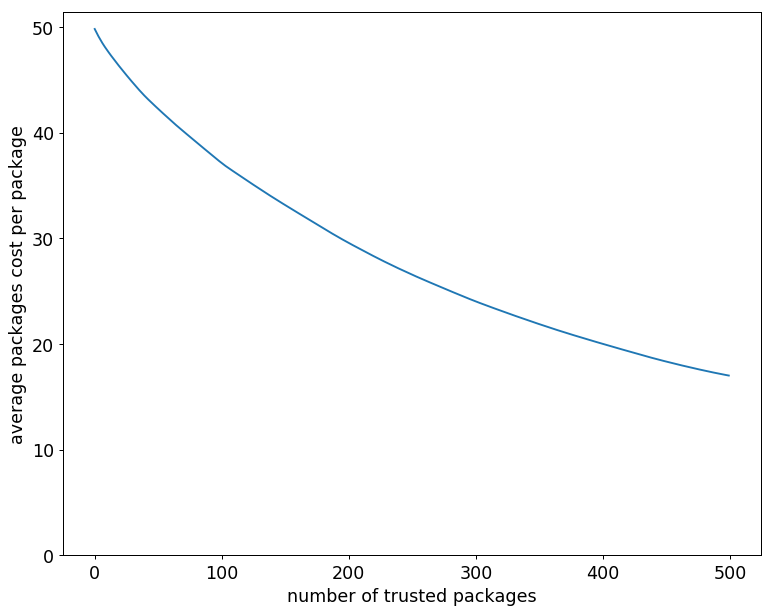

In [5]:
    import pandas as pd
    import math
    import matplotlib.pyplot as plt

    plt.figure(figsize=(10,8), dpi=90)

    plt.rcParams.update({'font.size': 14})

    data = pd.read_json('trustedPackagesCost.json')

    plt.xlabel('number of trusted packages')
    plt.ylabel('average packages cost per package')
    plt.plot(data[:500])
    plt.gca().set_ylim(ymin=0)

    plt.savefig("trustedPackagesCost_500.png")

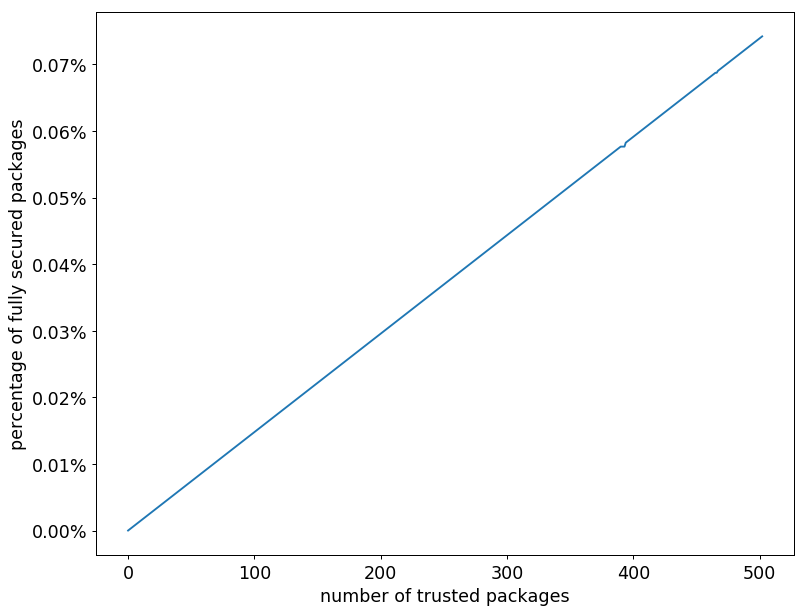

In [14]:
import pandas as pd
import math
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8), dpi=90)

plt.rcParams.update({'font.size': 14})

data = pd.read_json('trustedTop500/trustedPackagesSecured.json')
   
plt.xlabel('number of trusted packages')
plt.ylabel('percentage of fully secured packages')
plt.plot(data)
plt.gca().set_yticklabels(['{:.2f}%'.format(x*100) for x in plt.gca().get_yticks()]) 

plt.savefig("trustedPackagesSecuredPackages_500.png")